# Demo: Exploring Time Series Data

In [33]:
# Initial imports
import pandas as pd
import hvplot.pandas
import numpy as np
from pathlib import Path

## Loading Time Series Data Into a DataFrame

In [34]:
# Set the file path
file_path = Path("SPGlobal_Amazon.com,Inc._FinancialHighlights_17-Jul-2023.csv")

In [36]:
# Load time series data into Pandas
df = pd.read_csv(file_path, index_col="Period Ended", parse_dates=True)

In [37]:
# Display sample data
df.head(10)

,Total Assets,EBIT,Basic EPS
Period Ended,,,
2017-03-31,80969000.0,1005000.0,0.08
2017-06-30,87781000.0,628000.0,0.02
2017-09-30,115267000.0,347000.0,0.03
2017-12-31,131310000.0,2127000.0,0.19
2018-03-31,126362000.0,1927000.0,0.17
2018-06-30,134100000.0,2983000.0,0.26
2018-09-30,143695000.0,3724000.0,0.30
2018-12-31,162648000.0,3786000.0,0.31
2019-03-31,178102000.0,4420000.0,0.36


In [38]:
# Sort the DataFrame index in ascending order
df = df.sort_index()

# Display sample data
df.head(10)

,Total Assets,EBIT,Basic EPS
Period Ended,,,
2017-03-31,80969000.0,1005000.0,0.08
2017-06-30,87781000.0,628000.0,0.02
2017-09-30,115267000.0,347000.0,0.03
2017-12-31,131310000.0,2127000.0,0.19
2018-03-31,126362000.0,1927000.0,0.17
2018-06-30,134100000.0,2983000.0,0.26
2018-09-30,143695000.0,3724000.0,0.30
2018-12-31,162648000.0,3786000.0,0.31
2019-03-31,178102000.0,4420000.0,0.36


## Identifying Seasonal Patterns

<Axes: xlabel='Period Ended'>

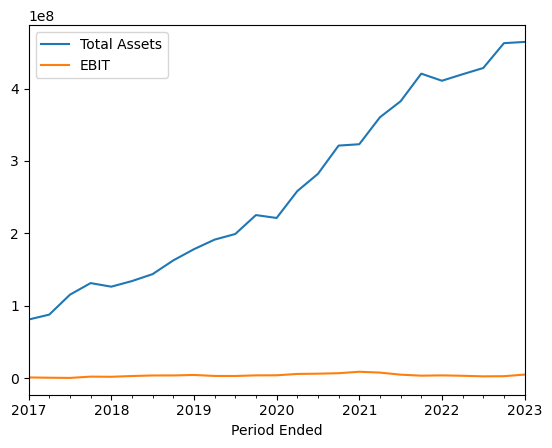

In [39]:
# Plot the inventory and homes_sold series
df[["Total Assets", "EBIT"]].plot()

In [40]:
# Select homes sold in 2014 using the year
sales_2018 = df["EBIT"].loc["2018"]

# Display 2014 home sales data
print(sales_2018)

Period Ended
2018-03-31    1927000.0
2018-06-30    2983000.0
2018-09-30    3724000.0
2018-12-31    3786000.0
Name: EBIT, dtype: float64


In [43]:
# Plot 2014 home sales data
sales_2018.hvplot.bar(title="EBIT in 2018")

:Bars   [Period Ended]   (EBIT)

In [44]:
# Compute the total home sales per quarter
quarterly_sales = df["EBIT"].groupby(by=[df.index.quarter]).sum()

In [45]:
# Display total home sales per quarter
quarterly_sales

Period Ended
1    29019000.0
2    23557000.0
3    20662000.0
4    22862000.0
Name: EBIT, dtype: float64

<Axes: xlabel='Period Ended'>

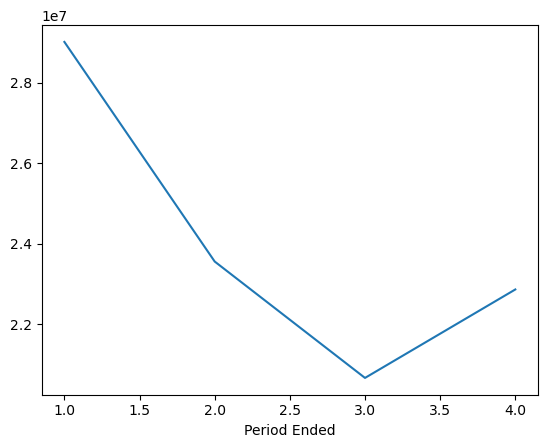

In [46]:
# Plot total home sales per quarter
quarterly_sales.plot()

In [47]:
# Compute total quarterly home sales per year
quarterly_eps_per_year = df["Basic EPS"].groupby(by=[df.index.year, df.index.quarter]).sum()

In [48]:
# Display total quarterly home sales per year
quarterly_eps_per_year

Period Ended  Period Ended
2017          1               0.08
              2               0.02
              3               0.03
              4               0.19
2018          1               0.17
              2               0.26
              3               0.30
              4               0.31
2019          1               0.36
              2               0.27
              3               0.22
              4               0.33
2020          1               0.26
              2               0.52
              3               0.63
              4               0.72
2021          1               0.80
              2               0.77
              3               0.31
              4               1.41
2022          1              -0.38
              2              -0.20
              3               0.28
              4               0.03
2023          1               0.31
Name: Basic EPS, dtype: float64

<Axes: xlabel='Period Ended,Period Ended'>

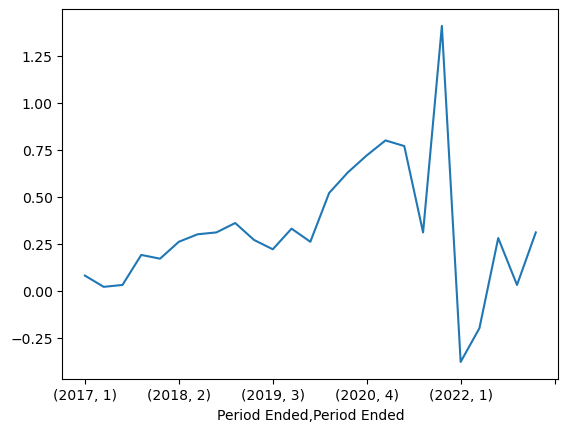

In [49]:
# Plot total quarterly home sales per year
quarterly_eps_per_year.plot()

In [50]:
quarterly_eps_per_year.index

MultiIndex([(2017, 1),
            (2017, 2),
            (2017, 3),
            (2017, 4),
            (2018, 1),
            (2018, 2),
            (2018, 3),
            (2018, 4),
            (2019, 1),
            (2019, 2),
            (2019, 3),
            (2019, 4),
            (2020, 1),
            (2020, 2),
            (2020, 3),
            (2020, 4),
            (2021, 1),
            (2021, 2),
            (2021, 3),
            (2021, 4),
            (2022, 1),
            (2022, 2),
            (2022, 3),
            (2022, 4),
            (2023, 1)],
           names=['Period Ended', 'Period Ended'])

In [52]:
# Plot quarterly home sales per year using a heatmap
df.hvplot.heatmap(
    x="index.year",                     
    y="index.quarter", 
    C="EBIT", 
    cmap="reds"
).aggregate(function=np.mean)

:HeatMap   [index.year,index.quarter]   (EBIT)